In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# Load the datasets
cancer = load_breast_cancer()
#X = cancer.data[:, :2]
X = cancer.data
y = cancer.target

In [ ]:
#pd.Series(y).unique()
np.unique(y)

array([0, 1])

In [ ]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.shape

(398, 30)

In [ ]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.5)

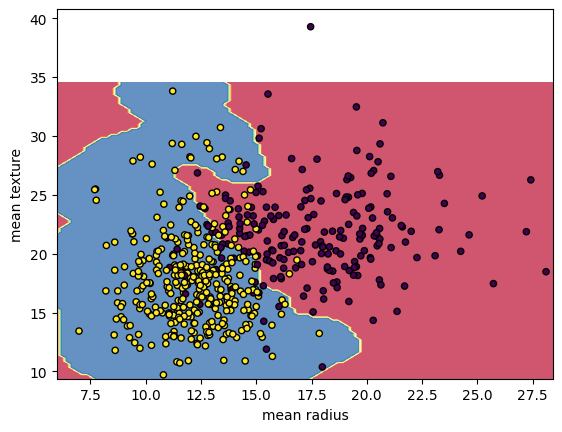

In [ ]:
DecisionBoundaryDisplay.from_estimator(
        svm,
        X_test,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy of the random forest classifier: ", accuracy_score(y_test, y_pred))

Accuracy of the random forest classifier:  0.8771929824561403


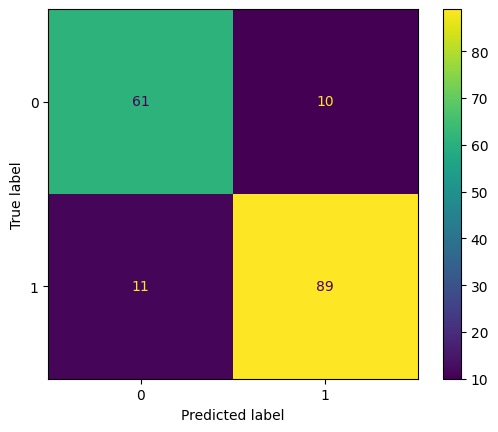

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# svm on all the features
# decision trees visualisations with different parameters, what are the top features used
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_proba = logisticReg.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
roc_auc

0.9312312312312312

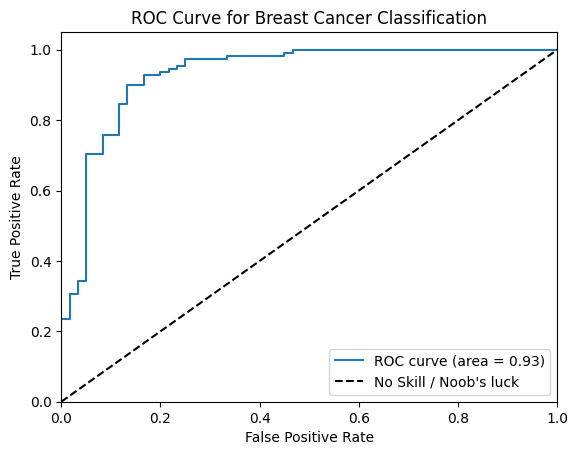

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill / Noob\'s luck')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

In [ ]:
X_test.shape
#logisticReg.predict_proba(X_test)[:,1]

(171, 2)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
class Debug(BaseEstimator, TransformerMixin):

    def transform(self, X):
        #print(X.shape)
        self.shape = X.shape
        # what other output you want
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [ ]:
def last_ten_columns(X):
    return X[:, -10:]

In [ ]:
pipe = Pipeline(steps=[
        ('func_trans', FunctionTransformer(last_ten_columns)),
        ('pca', PCA()),
        ("debug", Debug()),
        ('logistic', LogisticRegression())]
      )

In [ ]:
params_grid = {
    'pca__n_components': [5, 10],
    #'logistic__C': np.logspace(-4, 4, 3)
    }

In [ ]:
estimator = GridSearchCV(pipe, params_grid)
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('func_trans',
                                        FunctionTransformer(func=<function last_ten_columns at 0x7ab7f73101f0>)),
                                       ('pca', PCA()), ('debug', Debug()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'pca__n_components': [5, 10]})

In [ ]:
estimator.best_params_

{'pca__n_components': 5}

In [ ]:
#[ l for l in dir(estimator.best_estimator_.named_steps['pca']) if not l[0] == '_' ]
estimator.best_estimator_.named_steps['pca'].components_.shape

(5, 10)

In [ ]:
#https://stackoverflow.com/questions/48743032/get-intermediate-data-state-in-scikit-learn-pipeline
estimator.best_estimator_.named_steps['debug'].shape

(398, 5)

In [ ]:
estimator.best_estimator_.named_steps['pca'].n_samples_

398

In [ ]:
#https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/
# explaination through maximum likelihood
#https://plainenglish.io/blog/logistic-regression-from-scratch-7b707662c8b9

In [ ]:
#https://towardsdatascience.com/improve-your-data-preprocessing-with-columntransformer-and-pipelines-b6ff7edd2f77
#https://stackoverflow.com/questions/53561598/sklearn-pipeline-with-pca-on-feature-subset-using-functiontransformer
#https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/